In [1]:
import torch

In [2]:
x = torch.arange(0,12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

torch.Size([12])

In [4]:
x.numel()

12

In [5]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
torch.zeros(2,3,4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
torch.tensor([[[1,2,3],[1,2,3]]]).shape

torch.Size([1, 2, 3])

In [9]:
x = torch.tensor([1.0, 2, 3])
y = torch.tensor([4, 5, 6])
x + y, x - y, x / y, x ** y # ** 是幂运算

(tensor([5., 7., 9.]),
 tensor([-3., -3., -3.]),
 tensor([0.2500, 0.4000, 0.5000]),
 tensor([  1.,  32., 729.]))

In [10]:
torch.exp(x) # e的x次方

tensor([ 2.7183,  7.3891, 20.0855])

In [11]:
X = torch.arange(12, dtype=torch.float32).reshape(3,4)
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat([X, Y], dim=0), torch.cat([X, Y], dim=1) # dim = 0 竖直拼接按行堆叠，dim = 1 水平拼接按列堆叠

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [12]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [13]:
X.sum() # 对所有元素求和

tensor(66.)

广播机制

In [14]:
a = torch.arange(3).reshape(3, 1)
b = torch.arange(2).reshape(1, 2)
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [15]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

**广播规则：**

1.如果两个张量的维度数不相同，先通过在较小的维度张量前面添加维度使它们的维度数相同。

2.在每个维度上，如果两个张量的大小相等，或者其中一个为 1，则认为它们是可兼容的，可以进行广播。

3.计算结果的形状是输入张量形状中的每个维度的最大值。

4.如果某个维度的大小为 1，它会被扩展为与另一个张量该维度相同的大小。

In [16]:
# 创建一个形状为 3 的张量
a = torch.tensor([1, 2, 3])

# 创建一个形状为 2x1 的张量
b = torch.tensor([[10], [20]])
a + b

tensor([[11, 12, 13],
        [21, 22, 23]])

在这个例子中，a 是形状为 (3,) 的 1D 张量，b 是形状为 (2, 1) 的 2D 张量。通过广播，a 被扩展为 (2, 3)，b 的第二维从 1 扩展为 3，最后两个张量逐元素相加，得到形状为 (2, 3) 的结果。

In [17]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [18]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [19]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [20]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [21]:
z = torch.zeros_like(Y)
print(id(z))
z[:] = X + Y # 将z的值改写为为X+Y而不是重新创建一个z
print(id(z))

2376909284912
2376909284912


In [22]:
before = id(X)
X += Y # 或者 X[:] = X +Y
id(X) == before

True

In [23]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [24]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a) # item()是numpy的浮点数

(tensor([3.5000]), 3.5, 3.5, 3)

In [25]:
import os

os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000')

In [26]:
import pandas as pd
data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [27]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs

,NumRooms,Alley
0,NaN,Pave
1,2.0,NaN
2,4.0,NaN
3,NaN,NaN


In [28]:
outputs

0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64

In [29]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [30]:
inputs = pd.get_dummies(inputs, dummy_na=True) # dummy_na=True 将创建一个额外的列
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [31]:
inputs.values

array([[3., 1., 0.],
       [2., 0., 1.],
       [4., 0., 1.],
       [3., 0., 1.]])

In [32]:
import torch
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

**线性代数**

In [33]:
import torch
x=torch.tensor([3.0])
y=torch.tensor([2.0])
x+y,x*y,x/y,x**y

(tensor([5.]), tensor([6.]), tensor([1.5000]), tensor([9.]))

In [34]:
A=torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [35]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [36]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [37]:
A = torch.arange(20, dtype=torch.float32).reshape(5,4)
B = A.clone() # 通过分配新的内存将A复制到B
A, A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [38]:
# 对应元素相乘 哈达玛积
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [39]:
A=torch.arange(40, dtype=torch.float32).reshape(2,5,4)
A.shape, A.sum()

(torch.Size([2, 5, 4]), tensor(780.))

In [40]:
A

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]],

        [[20., 21., 22., 23.],
         [24., 25., 26., 27.],
         [28., 29., 30., 31.],
         [32., 33., 34., 35.],
         [36., 37., 38., 39.]]])

In [41]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([[20., 22., 24., 26.],
         [28., 30., 32., 34.],
         [36., 38., 40., 42.],
         [44., 46., 48., 50.],
         [52., 54., 56., 58.]]),
 torch.Size([5, 4]))

In [42]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([[ 40.,  45.,  50.,  55.],
         [140., 145., 150., 155.]]),
 torch.Size([2, 4]))

In [43]:
A.sum(axis=[0,1])

tensor([180., 190., 200., 210.])

In [44]:
A.mean(), A.sum()/A.numel()

(tensor(19.5000), tensor(19.5000))

In [45]:
A=torch.arange(20, dtype=torch.float32).reshape(5,4)
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [46]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [47]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [48]:
# 累加求和
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

In [49]:
x = torch.tensor([1, 2, 3, 4],dtype=torch.float32)
y = torch.ones(4, dtype=torch.float32)
x,y,torch.dot(x, y)

(tensor([1., 2., 3., 4.]), tensor([1., 1., 1., 1.]), tensor(10.))

In [50]:
A.shape,x.shape,A,x,torch.mv(A,x)

(torch.Size([5, 4]),
 torch.Size([4]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([1., 2., 3., 4.]),
 tensor([ 20.,  60., 100., 140., 180.]))

In [51]:
B = torch.ones(4,3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

L2范数 平方求和开根号

In [52]:
u = torch.tensor([3.0, 4.0])
torch.norm(u)

tensor(5.)

L1范数 取绝对值相加

In [53]:
torch.abs(u).sum()

tensor(7.)

In [54]:
import torch
x = torch.arange(4.0, requires_grad=True)
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [55]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [56]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [57]:
x.grad == 4 * x

tensor([True, True, True, True])

In [58]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

线性回归

In [59]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [60]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, torch.reshape(y, (-1, 1))
return_w = torch.tensor([2, -3.4])
return_b = 4.2
features, labels = synthetic_data(return_w, return_b, 1000)


In [61]:
print(features[0], labels[0])

tensor([-0.4682,  0.2568]) tensor([2.4127])


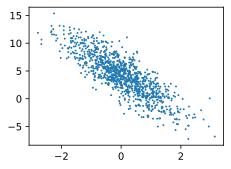

In [62]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(), 1);

In [63]:
features,labels,len(features)

(tensor([[-0.4682,  0.2568],
         [-0.8338, -0.5295],
         [-0.5974,  0.3540],
         ...,
         [-0.1070,  1.3816],
         [ 0.6374,  1.0747],
         [ 1.1731,  0.2871]]),
 tensor([[ 2.4127],
         [ 4.3456],
         [ 1.7975],
         [ 4.3231],
         [ 5.1991],
         [ 5.6249],
         [ 6.6163],
         [ 4.5002],
         [11.2610],
         [ 5.7524],
         [ 2.7256],
         [ 8.0525],
         [ 8.5470],
         [ 0.9391],
         [ 4.3894],
         [ 9.9151],
         [ 7.1113],
         [ 3.6911],
         [ 8.3705],
         [ 5.5497],
         [ 6.3403],
         [ 1.7218],
         [ 1.2933],
         [ 5.0411],
         [ 5.9316],
         [ 9.2872],
         [ 0.4850],
         [ 1.6260],
         [ 5.8435],
         [-2.7007],
         [ 3.7710],
         [-3.3172],
         [ 5.4976],
         [11.8724],
         [10.7946],
         [ 2.3793],
         [ 1.2094],
         [-3.7509],
         [ 1.4727],
         [ 5.4719],
         [

In [64]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.0507, -0.6217],
        [ 1.9860, -0.8141],
        [ 0.5084, -1.6625],
        [ 1.9772, -0.6509],
        [ 0.5673, -0.7059],
        [ 1.3556,  0.6265],
        [ 0.7587, -0.4069],
        [-2.3814,  0.4856],
        [ 0.3583,  0.3450],
        [ 0.3794,  1.0537]]) 
 tensor([[ 6.4053],
        [10.9415],
        [10.8781],
        [10.3800],
        [ 7.7402],
        [ 4.7721],
        [ 7.1193],
        [-2.2195],
        [ 3.7501],
        [ 1.3768]])


In [65]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w

tensor([[-0.0087],
        [ 0.0142]], requires_grad=True)

In [66]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [67]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [68]:
def sgd(params, lr, batch_size):
    with torch.no_grad(): # 由于下面代码块中有梯度计算，所以需要关闭梯度计算
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [71]:
lr = 0.001
num_epochs = 10
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        print(l.sum())
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

tensor(4.3348, grad_fn=<SumBackward0>)
tensor(4.6758, grad_fn=<SumBackward0>)
tensor(1.9939, grad_fn=<SumBackward0>)
tensor(1.3482, grad_fn=<SumBackward0>)
tensor(4.9104, grad_fn=<SumBackward0>)
tensor(3.3482, grad_fn=<SumBackward0>)
tensor(1.8745, grad_fn=<SumBackward0>)
tensor(4.3569, grad_fn=<SumBackward0>)
tensor(2.9200, grad_fn=<SumBackward0>)
tensor(3.5105, grad_fn=<SumBackward0>)
tensor(2.6911, grad_fn=<SumBackward0>)
tensor(6.7529, grad_fn=<SumBackward0>)
tensor(1.0889, grad_fn=<SumBackward0>)
tensor(2.4299, grad_fn=<SumBackward0>)
tensor(4.2055, grad_fn=<SumBackward0>)
tensor(1.3487, grad_fn=<SumBackward0>)
tensor(3.8673, grad_fn=<SumBackward0>)
tensor(3.6635, grad_fn=<SumBackward0>)
tensor(4.2988, grad_fn=<SumBackward0>)
tensor(4.1299, grad_fn=<SumBackward0>)
tensor(1.9365, grad_fn=<SumBackward0>)
tensor(3.4661, grad_fn=<SumBackward0>)
tensor(3.7640, grad_fn=<SumBackward0>)
tensor(5.3797, grad_fn=<SumBackward0>)
tensor(3.1252, grad_fn=<SumBackward0>)
tensor(4.2982, grad_fn=<S

In [226]:
w, b

(tensor([[ 1.6397],
         [-2.5805]], requires_grad=True),
 tensor([3.1981], requires_grad=True))

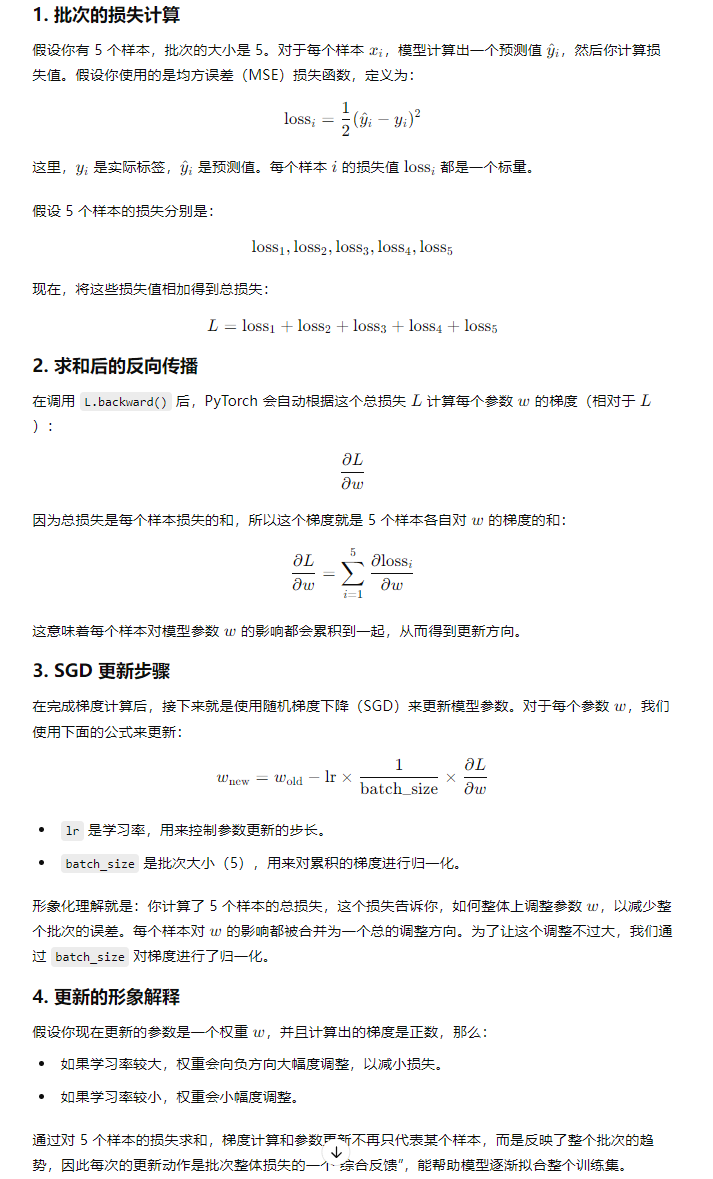

In [236]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [243]:
def load_array(data_arrays ,batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[-0.5950,  0.1002],
         [-1.1208, -2.0688],
         [-1.7895, -1.3513],
         [ 1.0270, -0.0669],
         [ 1.5084, -0.4997],
         [-0.0841,  1.3881],
         [ 1.2943,  0.9121],
         [-1.1440, -0.2737],
         [-0.0098,  1.0138],
         [-0.2819,  1.6534]]),
 tensor([[ 2.6821],
         [ 8.9973],
         [ 5.2168],
         [ 6.4998],
         [ 8.9124],
         [-0.6913],
         [ 3.6851],
         [ 2.8387],
         [ 0.7213],
         [-1.9827]])]

In [238]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))

In [239]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [240]:
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [244]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step() # 更新参数
    l = loss(net(features), labels) # 计算当前训练轮次下更新完参数后的损失函数
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000217
epoch 2, loss 0.000097
epoch 3, loss 0.000097
